## This notebook is dedicated to some EDA based on our business questions:

    - Does the airline have an impact on number of flights?
    - Do the airports (origin and destination) affect the amount of flights?
    - What is the impact of the day of the week on the amount of flights?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### We started by importing the necessary libraries and will now get the clean data

In [2]:
clean=pd.read_csv('../Data/clean/cleaned_airlines.csv')

In [3]:
clean

,airline,flight_id,airport_from,airport_to,day_of_week,departure_hour,flight_length,delay,part_of_day
0,CO,269,SFO,IAH,3,0,205,1,night
1,US,1558,PHX,CLT,3,0,222,1,night
2,AA,2400,LAX,DFW,3,0,165,1,night
3,AA,2466,SFO,DFW,3,0,195,1,night
4,AS,108,ANC,SEA,3,0,202,0,night
...,...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,23,326,0,night
539379,FL,398,SEA,ATL,5,23,305,0,night
539380,FL,609,SFO,MKE,5,23,255,0,night
539381,UA,78,HNL,SFO,5,23,313,1,night


### Let's start by checking the amount of flights per airline and per day of the week

In [4]:
al_plot = clean.groupby(['airline']).agg({'flight_id':'count'}).reset_index()
week_plot = clean.groupby(['day_of_week']).agg({'flight_id':'count'}).reset_index()

In [5]:
display(al_plot)
print()
display(week_plot)

,airline,flight_id
0,9E,20686
1,AA,45656
2,AS,11471
3,B6,18112
4,CO,21118
5,DL,60940
6,EV,27983
7,F9,6456
8,FL,20827
9,HA,5578


,day_of_week,flight_id
0,1,72769
1,2,71340
2,3,89746
3,4,91445
4,5,85248
5,6,58956
6,7,69879


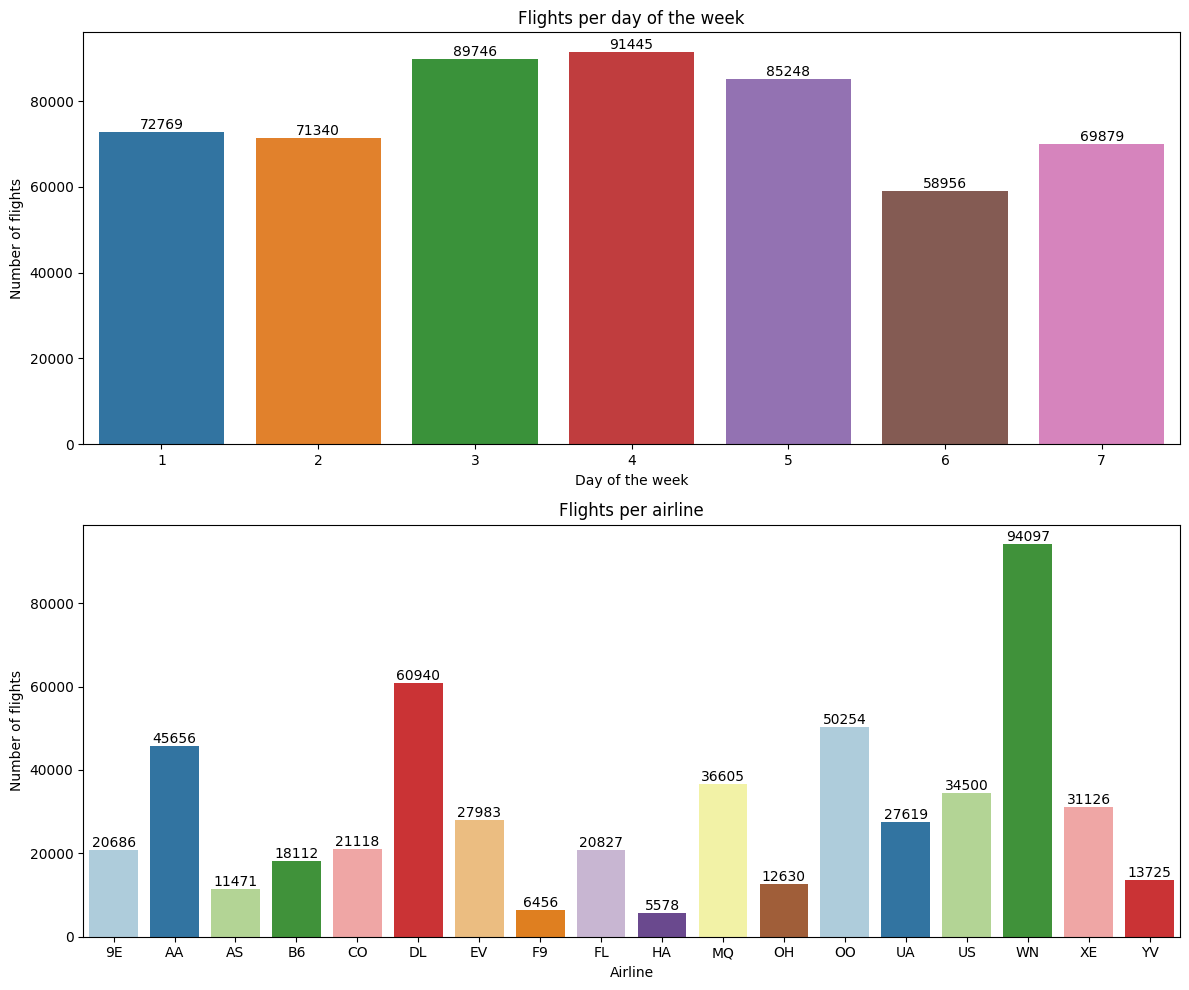

In [6]:
fig,ax = plt.subplots(2, 1, figsize=(12,10))

wp = sns.barplot(data=week_plot, x='day_of_week', y='flight_id', ax=ax[0], palette=sns.color_palette())
wp.bar_label(wp.containers[0], label_type='edge')
wp.set(ylabel='Number of flights', xlabel='Day of the week', title='Flights per day of the week')

ap = sns.barplot(data=al_plot, x='airline', y='flight_id', ax=ax[1], palette=sns.color_palette('Paired'))
ap.bar_label(ap.containers[0], label_type='edge')
ap.set(ylabel='Number of flights', xlabel='Airline', title='Flights per airline')

plt.tight_layout()
plt.show()

### On the top plot there's not an extreme variance, but surprisingly wednesday and thursday sit at the top, with friday very close behind and saturday at the bottom

### On the bottom one we have a very clear spike with WN (Southwest Airlines), while DL(Delta Air Lines), OO(SkyWest Airlines) and AA(American Airlines) are up next.

### Up next we'll check the differences in number of flights based on the airport

In [7]:
air_from = clean.groupby(['airport_from']).agg({'flight_id':'count'}).reset_index()
air_to = clean.groupby(['airport_to']).agg({'flight_id':'count'}).reset_index()

In [8]:
display(air_from)
print()
display(air_to)

,airport_from,flight_id
0,ABE,342
1,ABI,211
2,ABQ,2799
3,ABR,2
4,ABY,87
...,...,...
288,VPS,633
289,WRG,59
290,XNA,1128
291,YAK,57


,airport_to,flight_id
0,ABE,305
1,ABI,211
2,ABQ,2800
3,ABR,2
4,ABY,87
...,...,...
288,VPS,633
289,WRG,59
290,XNA,1123
291,YAK,57


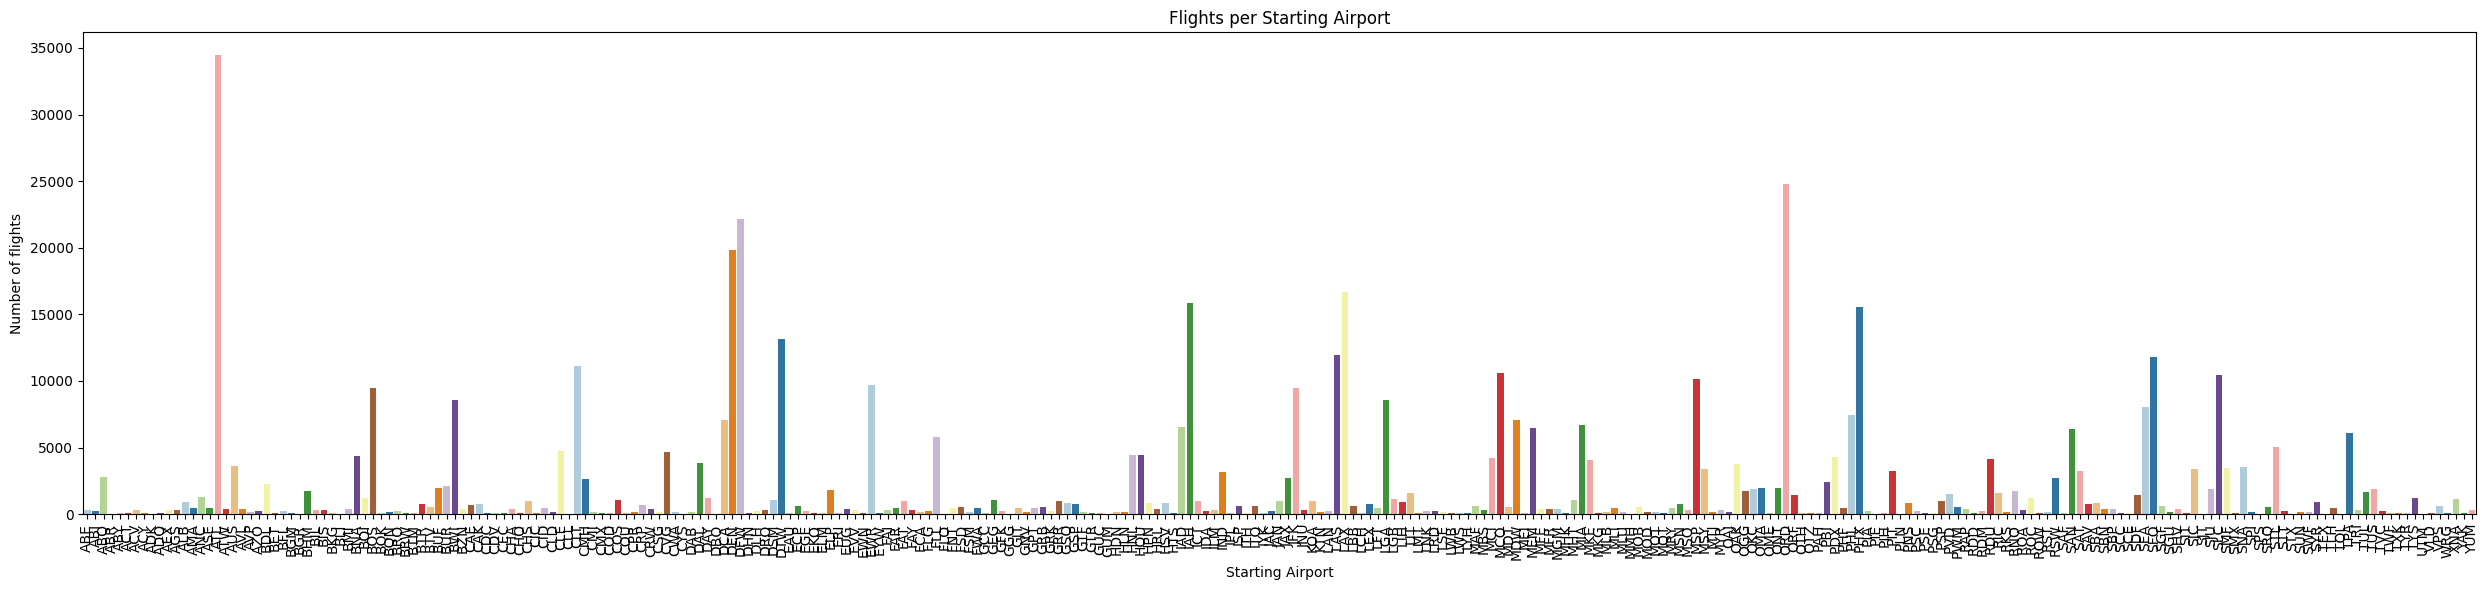

In [9]:
fig,ax = plt.subplots(figsize=(25,6))

af = sns.barplot(data=air_from, x='airport_from', y='flight_id', palette=sns.color_palette('Paired'))

af.set(ylabel='Number of flights', xlabel='Starting Airport', title='Flights per Starting Airport')
af.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

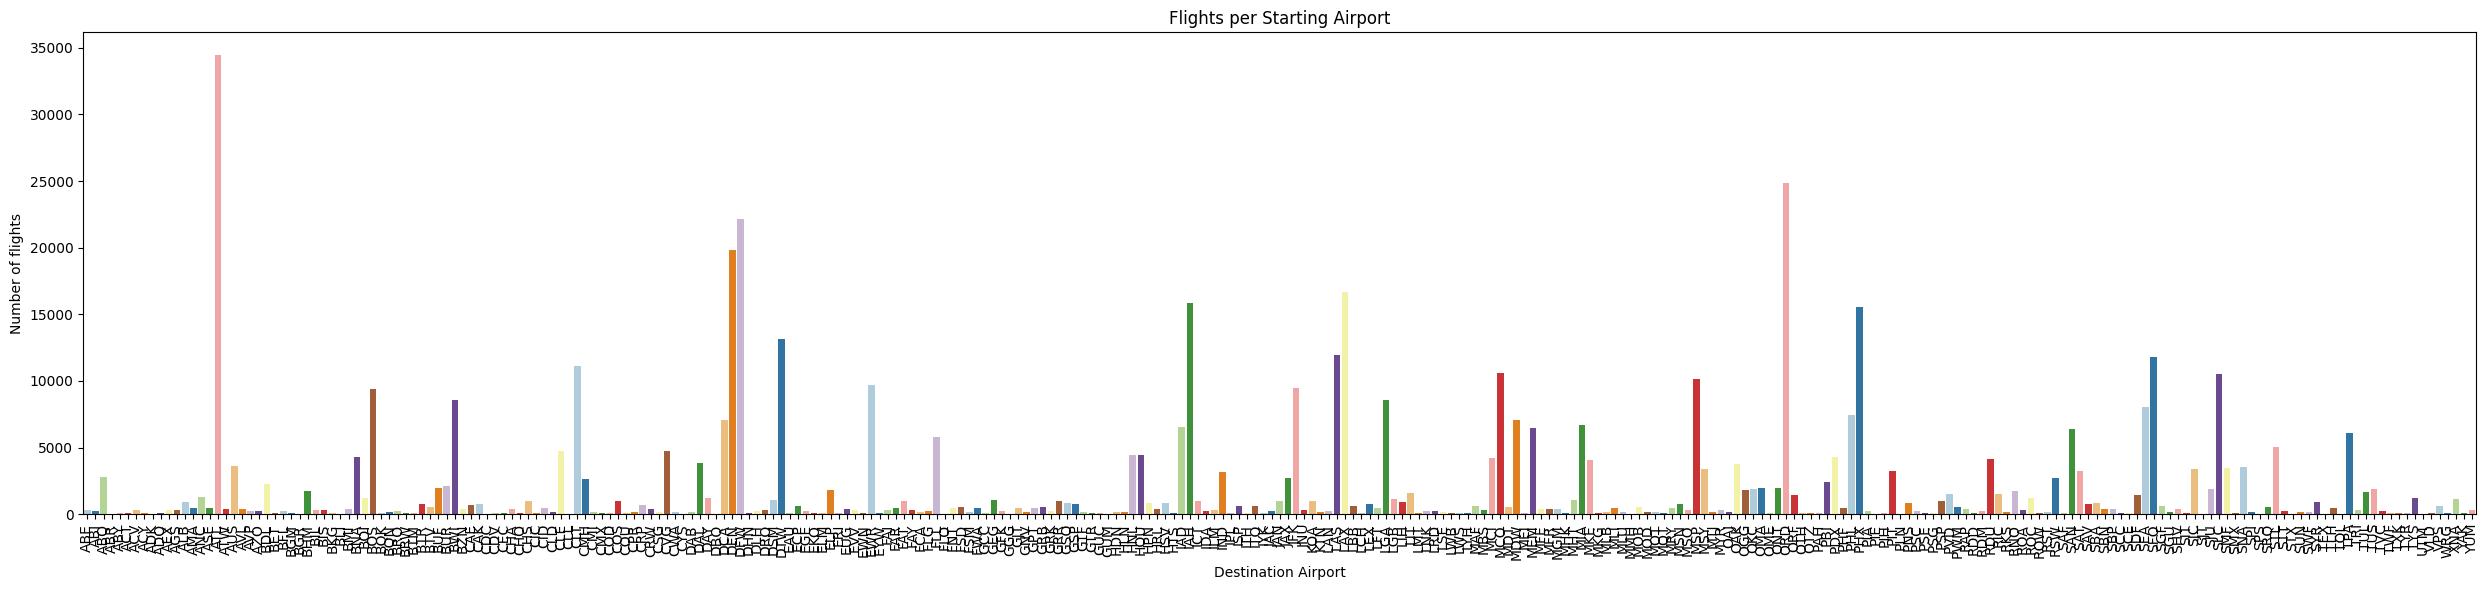

In [10]:
fig,ax = plt.subplots(figsize=(25,6))

at = sns.barplot(data=air_to, x='airport_to', y='flight_id', palette=sns.color_palette('Paired'))

at.set(ylabel='Number of flights', xlabel='Destination Airport', title='Flights per Starting Airport')
at.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### On these last 2 plots we can clearly see that some airports stand out, but it's incredibily hard to tell which ones

### Finally we'll take a loot at the departure hour and corresponding part of day

In [11]:
hour_plot = clean.groupby(['departure_hour']).agg({'flight_id':'count'}).reset_index()
part_plot = clean.groupby(['part_of_day']).agg({'flight_id':'count'}).reset_index()

In [12]:
display(hour_plot)
print()
display(part_plot)

,departure_hour,flight_id
0,0,802
1,1,346
2,2,89
3,4,99
4,5,4840
5,6,38859
6,7,36847
7,8,37510
8,9,33622
9,10,34725


,part_of_day,flight_id
0,afternoon,236094
1,morning,252188
2,night,51101


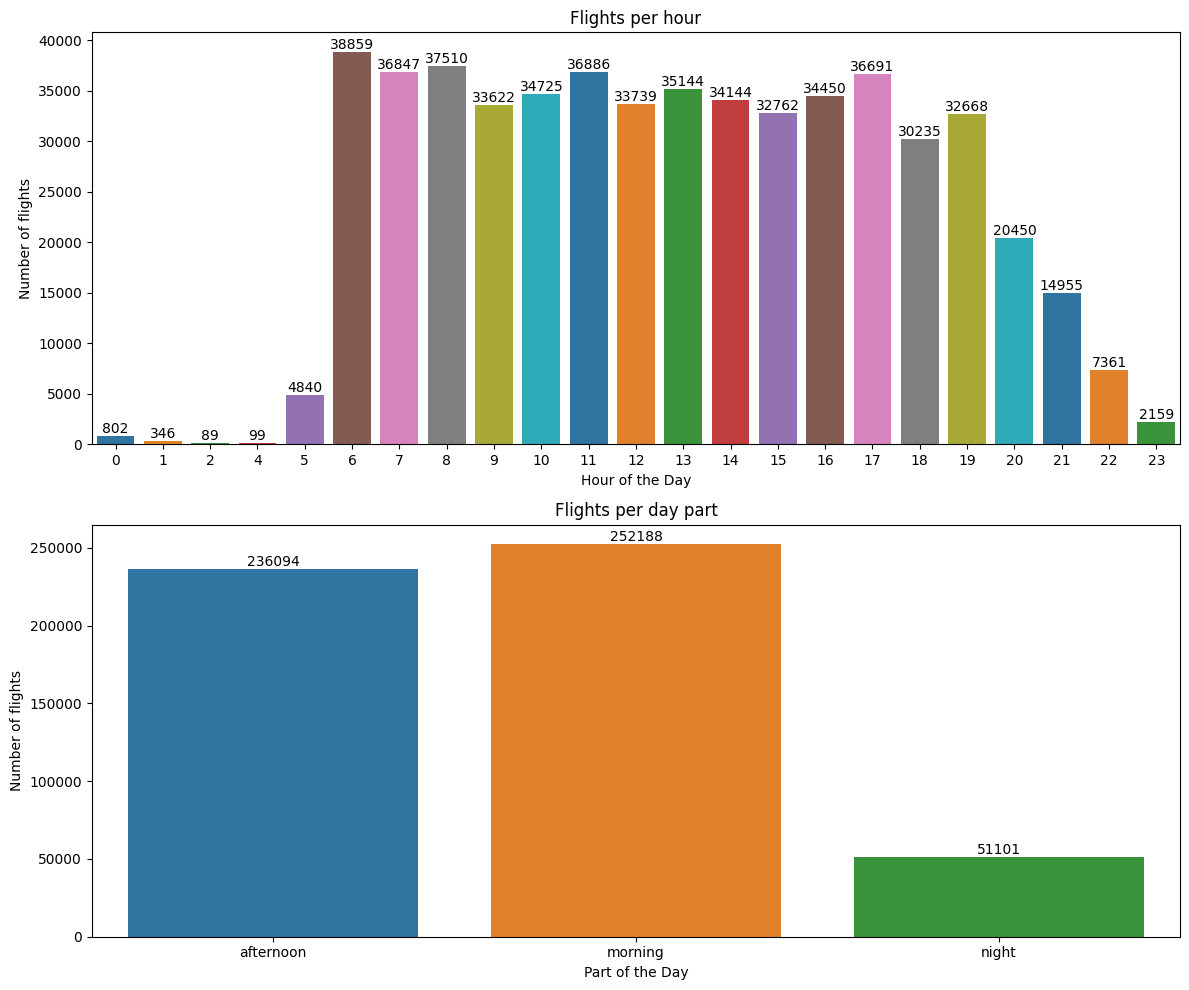

In [13]:
fig,ax = plt.subplots(2, 1, figsize=(12,10))

hp = sns.barplot(data=hour_plot, x='departure_hour', y='flight_id', ax=ax[0], palette=sns.color_palette())
hp.bar_label(hp.containers[0], label_type='edge')
hp.set(ylabel='Number of flights', xlabel='Hour of the Day', title='Flights per hour')

pp = sns.barplot(data=part_plot, x='part_of_day', y='flight_id', ax=ax[1], palette=sns.color_palette())
pp.bar_label(pp.containers[0], label_type='edge')
pp.set(ylabel='Number of flights', xlabel='Part of the Day', title='Flights per day part')

plt.tight_layout()
plt.show()

### As it is clearly shown on both plots, flights start picking at at about 6h, and when it gets to around 20h, the amount starts drastically decreasing